In [1]:
# pip install python-louvain
# pip install community

In [2]:
import os
import csv
import networkx as nx
import community as cm
from matplotlib import pyplot as plt
import matplotlib.cm as matcm

In [3]:
print (os.getcwd())

C:\Users\13193\Documents\Masters\SocialAnalytics\Week 3\Lab2_Python


In [4]:
#Load the data
with open('legislators.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('cosponsors.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [5]:
display(nodes[:5])
display(edges[:5])

[['BF1', 'R', 'M', 'BillFlores', '1', '4'],
 ['BF2', 'R', 'M', 'BlakeFarenthold', '2', '4'],
 ['BG', 'R', 'M', 'BobGoodlatte', '3', '2'],
 ['BL', 'R', 'M', 'BillyLong', '4', '4'],
 ['CC', 'R', 'M', 'CurtClawson', '5', '1']]

[('BF1', 'BF2'), ('BF1', 'BG'), ('BF1', 'BL'), ('BF1', 'CC'), ('BF1', 'CH')]

In [6]:
# Data Conversion
# Convert the data frame to networkx format. We use the legislators as the node attributes. This is not a directed graph.
# initialize a graph object
G = nx.Graph()

# add your lists of nodes and edges
G.add_nodes_from(node_names)
G.add_edges_from(edges)

# Create an empty dictionary for each attribute
party_dict = {}
gender_dict = {}
legislator_dict = {}
num_dict = {}
tenure_dict = {}

for node in nodes: # Loop through the list of nodes, one row at a time
    party_dict[node[0]] = node[1] # Access the correct item, add it to the corresponding dictionary
    gender_dict[node[0]] = node[2]
    legislator_dict[node[0]] = node[3]
    num_dict[node[0]] = int(node[4])
    tenure_dict[node[0]] = int(node[5])

# Add each dictionary as a node attribute to the Graph object
nx.set_node_attributes(G, party_dict, 'Party')
nx.set_node_attributes(G, gender_dict, 'Gender')
nx.set_node_attributes(G, legislator_dict, 'Legislator')
nx.set_node_attributes(G, num_dict, 'Num')
nx.set_node_attributes(G, tenure_dict, 'Tenure')

### Graph Metrics: 
Graph Metrics
These are the overall metrics for the entire graph or network.

- Number of vertices - You can use either the len() or the number_of_nodes() function

In [7]:
len(G)

35

In [8]:
G.number_of_nodes()

35

- Number of edges or ties - You can use either the size() or the number_of_edges() function

In [9]:
G.size()

446

In [10]:
G.number_of_edges()

446

- Network density
https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.density.html

In [11]:
nx.density(G)

0.7495798319327731

- Maximum Geodesic Distance
https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.distance_measures.diameter.html

In [12]:
nx.extrema_bounding(G, compute = 'periphery')

['DE', 'EJ', 'LS', 'MB', 'PG']

- Reciprocity of the Network - This measure is only meaningful for a directed graph.
https://networkx.github.io/documentation/stable/reference/algorithms/reciprocity.html#

In [13]:
# If `nodes` is not specified, calculate the reciprocity of the graph
nx.overall_reciprocity(G)

0.0

We know reciprocity is the ratio of the number of nodes pointing in both directions to the total number of nodes. Thus, for an undirected (bidirectional) graph reciprocity is always 1.

But, in networkx an undirected graph is considered not to have any bidirectional or unidirectional nodes. Hence, the value of reciprocity is 0.

In [14]:
# If `nodes` represents a single node in the graph, return only its reciprocity
nx.reciprocity(G, nodes = 'BF2')

AttributeError: 'Graph' object has no attribute 'predecessors'

Error because the graph is not directed and thus, the nodes do not have predecessors or successors.

If nodes = 'None', then the overall_reciprocity is returned.

Transitivity of the Network
https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.cluster.transitivity.html

In [15]:
nx.transitivity(G)

0.9882638607851072

####  Ego Metrics
These are the connectedness and structural equivalence metrics for egos in the network.

- Degree centrality
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

In [16]:
nx.degree_centrality(G)

{'BF1': 0.8529411764705882,
 'BF2': 0.8529411764705882,
 'BG': 0.8529411764705882,
 'BL': 0.8529411764705882,
 'CC': 0.8529411764705882,
 'CH': 0.8529411764705882,
 'CM': 0.8529411764705882,
 'DE': 0.11764705882352941,
 'DJ': 0.8529411764705882,
 'EC': 0.8529411764705882,
 'EJ': 0.11764705882352941,
 'JB': 0.8529411764705882,
 'JC1': 0.8529411764705882,
 'JC2': 0.8529411764705882,
 'JK': 0.8529411764705882,
 'JR': 0.8529411764705882,
 'KB': 0.8529411764705882,
 'KG': 0.8529411764705882,
 'LB': 0.8529411764705882,
 'LS': 0.11764705882352941,
 'MC': 0.8529411764705882,
 'MM1': 0.8529411764705882,
 'MM2': 0.8529411764705882,
 'PK': 0.8529411764705882,
 'PO': 0.8529411764705882,
 'PS': 0.8529411764705882,
 'RB': 0.8529411764705882,
 'RN': 0.8823529411764706,
 'RW': 0.8529411764705882,
 'SP1': 0.8529411764705882,
 'SP2': 0.9705882352941176,
 'TP': 0.8529411764705882,
 'WH': 0.8529411764705882,
 'MB': 0.11764705882352941,
 'PG': 0.029411764705882353}

In [17]:
nx.in_degree_centrality(G)

NetworkXNotImplemented: not implemented for undirected type

In [18]:
nx.out_degree_centrality(G)

NetworkXNotImplemented: not implemented for undirected type

As you can see in the error message, these functions do not work for undirected graphs.

- Betweenness Centrality

-- Compute the shortest-path betweenness centrality for nodes.

-- Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

If you run into errors in computing this, you need to change the decorator version
pip install decorator==5.0.9

then reboot

In [19]:
nx.betweenness_centrality(G)

{'BF1': 0.0,
 'BF2': 0.0,
 'BG': 0.0,
 'BL': 0.0,
 'CC': 0.0,
 'CH': 0.0,
 'CM': 0.0,
 'DE': 0.0,
 'DJ': 0.0,
 'EC': 0.0,
 'EJ': 0.0,
 'JB': 0.0,
 'JC1': 0.0,
 'JC2': 0.0,
 'JK': 0.0,
 'JR': 0.0,
 'KB': 0.0,
 'KG': 0.0,
 'LB': 0.0,
 'LS': 0.0,
 'MC': 0.0,
 'MM1': 0.0,
 'MM2': 0.0,
 'PK': 0.0,
 'PO': 0.0,
 'PS': 0.0,
 'RB': 0.0,
 'RN': 0.058823529411764705,
 'RW': 0.0,
 'SP1': 0.0,
 'SP2': 0.21390374331550802,
 'TP': 0.0,
 'WH': 0.0,
 'MB': 0.0,
 'PG': 0.0}

In [20]:
nx.betweenness_centrality(G)

{'BF1': 0.0,
 'BF2': 0.0,
 'BG': 0.0,
 'BL': 0.0,
 'CC': 0.0,
 'CH': 0.0,
 'CM': 0.0,
 'DE': 0.0,
 'DJ': 0.0,
 'EC': 0.0,
 'EJ': 0.0,
 'JB': 0.0,
 'JC1': 0.0,
 'JC2': 0.0,
 'JK': 0.0,
 'JR': 0.0,
 'KB': 0.0,
 'KG': 0.0,
 'LB': 0.0,
 'LS': 0.0,
 'MC': 0.0,
 'MM1': 0.0,
 'MM2': 0.0,
 'PK': 0.0,
 'PO': 0.0,
 'PS': 0.0,
 'RB': 0.0,
 'RN': 0.058823529411764705,
 'RW': 0.0,
 'SP1': 0.0,
 'SP2': 0.21390374331550802,
 'TP': 0.0,
 'WH': 0.0,
 'MB': 0.0,
 'PG': 0.0}

 - Closeness Centrality

-- Related to a node's geodesic distance from other nodes in the network. The higher the value, the more prominence of the node (assuming they are all connected)

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

In [21]:
nx.closeness_centrality(G)

{'BF1': 0.8717948717948718,
 'BF2': 0.8717948717948718,
 'BG': 0.8717948717948718,
 'BL': 0.8717948717948718,
 'CC': 0.8717948717948718,
 'CH': 0.8717948717948718,
 'CM': 0.8717948717948718,
 'DE': 0.5230769230769231,
 'DJ': 0.8717948717948718,
 'EC': 0.8717948717948718,
 'EJ': 0.5230769230769231,
 'JB': 0.8717948717948718,
 'JC1': 0.8717948717948718,
 'JC2': 0.8717948717948718,
 'JK': 0.8717948717948718,
 'JR': 0.8717948717948718,
 'KB': 0.8717948717948718,
 'KG': 0.8717948717948718,
 'LB': 0.8717948717948718,
 'LS': 0.5230769230769231,
 'MC': 0.8717948717948718,
 'MM1': 0.8717948717948718,
 'MM2': 0.8717948717948718,
 'PK': 0.8717948717948718,
 'PO': 0.8717948717948718,
 'PS': 0.8717948717948718,
 'RB': 0.8717948717948718,
 'RN': 0.8947368421052632,
 'RW': 0.8717948717948718,
 'SP1': 0.8717948717948718,
 'SP2': 0.9714285714285714,
 'TP': 0.8717948717948718,
 'WH': 0.8717948717948718,
 'MB': 0.5230769230769231,
 'PG': 0.4788732394366197}

- Engenvector Centrality

-- Adjusts a node's prominence based on the relative prominence of the nodes to which it is tied

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

In [22]:
nx.eigenvector_centrality(G)

{'BF1': 0.18251395406889293,
 'BF2': 0.18251395406889293,
 'BG': 0.18251395406889293,
 'BL': 0.18251395406889293,
 'CC': 0.18251395406889293,
 'CH': 0.18251395406889293,
 'CM': 0.18251395406889293,
 'DE': 0.007054625021185524,
 'DJ': 0.18251395406889293,
 'EC': 0.18251395406889293,
 'EJ': 0.007054625021185524,
 'JB': 0.18251395406889293,
 'JC1': 0.18251395406889293,
 'JC2': 0.18251395406889293,
 'JK': 0.18251395406889293,
 'JR': 0.18251395406889293,
 'KB': 0.18251395406889293,
 'KG': 0.18251395406889293,
 'LB': 0.18251395406889293,
 'LS': 0.007054625021185524,
 'MC': 0.18251395406889293,
 'MM1': 0.18251395406889293,
 'MM2': 0.18251395406889293,
 'PK': 0.18251395406889293,
 'PO': 0.18251395406889293,
 'PS': 0.18251395406889293,
 'RB': 0.18251395406889293,
 'RN': 0.1827238911421679,
 'RW': 0.18251395406889293,
 'SP1': 0.18251395406889293,
 'SP2': 0.1834546525456788,
 'TP': 0.18251395406889293,
 'WH': 0.18251395406889293,
 'MB': 0.007054625021185524,
 'PG': 0.006299451747267275}

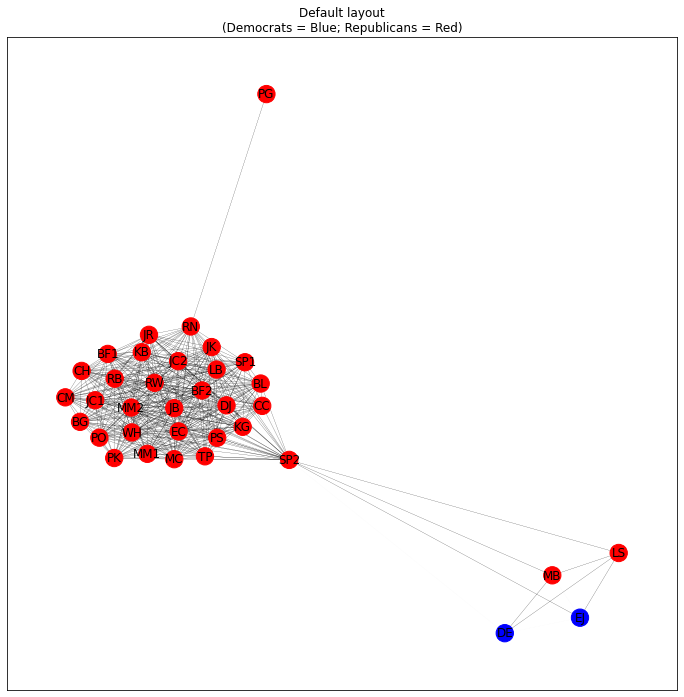

In [23]:
# Using Centrality Measures as Weights for Visualization
# node colour is either set to red when party is R and blue when party is D  
party_color = ["Red" if G.nodes[n]["Party"] == "R" else "Blue" for n in G.nodes] 
    
# fixing the size of the figure 
plt.figure(figsize = (12, 12))

# use centrality measures as edge weights (line width of edges)
measures = nx.eigenvector_centrality(G)

# Draw the network
nx.draw_networkx(G, node_color = party_color, with_labels = True, width = list(measures.values()), font_size = 12)

# Add title to the plot
plt.title("Default layout\n(Democrats = Blue; Republicans = Red)", loc='center')

plt.draw()

##### Constraints
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.structuralholes.constraint.html

In [24]:
nx.constraint(G)

{'BF1': 0.1325192555555902,
 'BF2': 0.1325192555555902,
 'BG': 0.1325192555555902,
 'BL': 0.1325192555555902,
 'CC': 0.1325192555555902,
 'CH': 0.1325192555555902,
 'CM': 0.1325192555555902,
 'DE': 0.6304988808539945,
 'DJ': 0.1325192555555902,
 'EC': 0.1325192555555902,
 'EJ': 0.6304988808539944,
 'JB': 0.1325192555555902,
 'JC1': 0.1325192555555902,
 'JC2': 0.13251925555559022,
 'JK': 0.1325192555555902,
 'JR': 0.1325192555555902,
 'KB': 0.1325192555555902,
 'KG': 0.1325192555555902,
 'LB': 0.1325192555555902,
 'LS': 0.6304988808539944,
 'MC': 0.1325192555555902,
 'MM1': 0.1325192555555902,
 'MM2': 0.1325192555555902,
 'PK': 0.1325192555555902,
 'PO': 0.1325192555555902,
 'PS': 0.1325192555555902,
 'RB': 0.1325192555555902,
 'RN': 0.12508323727795492,
 'RW': 0.1325192555555902,
 'SP1': 0.1325192555555902,
 'SP2': 0.11401102268071608,
 'TP': 0.1325192555555902,
 'WH': 0.1325192555555902,
 'MB': 0.6304988808539945,
 'PG': 1.0}

###### Shortest Paths
Compute shortest paths in the graph

It returns a dictionary of paths
path – All returned paths include both the source and target in the path.

If the source and target are both specified, return a single list of nodes in a shortest path from the source to the target.

If only the source is specified, return a dictionary keyed by targets with a list of nodes in a shortest path from the source to one of the targets.

If only the target is specified, return a dictionary keyed by sources with a list of nodes in a shortest path from one of the sources to the target.

If neither the source nor target are specified return a dictionary of dictionaries with path[source][target]=[list of nodes in path].

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path

In [25]:
nx.shortest_path(G)

{'BF1': {'BF1': ['BF1'],
  'BF2': ['BF1', 'BF2'],
  'BG': ['BF1', 'BG'],
  'BL': ['BF1', 'BL'],
  'CC': ['BF1', 'CC'],
  'CH': ['BF1', 'CH'],
  'CM': ['BF1', 'CM'],
  'DJ': ['BF1', 'DJ'],
  'EC': ['BF1', 'EC'],
  'JB': ['BF1', 'JB'],
  'JC1': ['BF1', 'JC1'],
  'JC2': ['BF1', 'JC2'],
  'JK': ['BF1', 'JK'],
  'JR': ['BF1', 'JR'],
  'KB': ['BF1', 'KB'],
  'KG': ['BF1', 'KG'],
  'LB': ['BF1', 'LB'],
  'MC': ['BF1', 'MC'],
  'MM1': ['BF1', 'MM1'],
  'MM2': ['BF1', 'MM2'],
  'PK': ['BF1', 'PK'],
  'PO': ['BF1', 'PO'],
  'PS': ['BF1', 'PS'],
  'RB': ['BF1', 'RB'],
  'RN': ['BF1', 'RN'],
  'RW': ['BF1', 'RW'],
  'SP1': ['BF1', 'SP1'],
  'SP2': ['BF1', 'SP2'],
  'TP': ['BF1', 'TP'],
  'WH': ['BF1', 'WH'],
  'PG': ['BF1', 'RN', 'PG'],
  'DE': ['BF1', 'SP2', 'DE'],
  'EJ': ['BF1', 'SP2', 'EJ'],
  'LS': ['BF1', 'SP2', 'LS'],
  'MB': ['BF1', 'SP2', 'MB']},
 'BF2': {'BF2': ['BF2'],
  'BF1': ['BF2', 'BF1'],
  'BG': ['BF2', 'BG'],
  'BL': ['BF2', 'BL'],
  'CC': ['BF2', 'CC'],
  'CH': ['BF2', 'CH'],
  

#### Descendants

Finds all vertices reachable from a given vertex, or the opposite: all vertices from which a given vertex is reachable via a directed path.

Return all nodes reachable from source in G

https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.dag.descendants.html

In [26]:
nx.descendants(G, source = "BF1")

{'BF2',
 'BG',
 'BL',
 'CC',
 'CH',
 'CM',
 'DE',
 'DJ',
 'EC',
 'EJ',
 'JB',
 'JC1',
 'JC2',
 'JK',
 'JR',
 'KB',
 'KG',
 'LB',
 'LS',
 'MB',
 'MC',
 'MM1',
 'MM2',
 'PG',
 'PK',
 'PO',
 'PS',
 'RB',
 'RN',
 'RW',
 'SP1',
 'SP2',
 'TP',
 'WH'}

##### Clustering Coefficient or Transitivity
Transitivity measures the probability that the adjacent vertices of a vertex are connected. This is sometimes also called the clustering coefficient.

https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.clustering.html

In [27]:
nx.clustering(G)
# Note that the local value for PG is 0 because it is isolated.

{'BF1': 1.0,
 'BF2': 1.0,
 'BG': 1.0,
 'BL': 1.0,
 'CC': 1.0,
 'CH': 1.0,
 'CM': 1.0,
 'DE': 1.0,
 'DJ': 1.0,
 'EC': 1.0,
 'EJ': 1.0,
 'JB': 1.0,
 'JC1': 1.0,
 'JC2': 1.0,
 'JK': 1.0,
 'JR': 1.0,
 'KB': 1.0,
 'KG': 1.0,
 'LB': 1.0,
 'LS': 1.0,
 'MC': 1.0,
 'MM1': 1.0,
 'MM2': 1.0,
 'PK': 1.0,
 'PO': 1.0,
 'PS': 1.0,
 'RB': 1.0,
 'RN': 0.9333333333333333,
 'RW': 1.0,
 'SP1': 1.0,
 'SP2': 0.7803030303030303,
 'TP': 1.0,
 'WH': 1.0,
 'MB': 1.0,
 'PG': 0}

##### Part 2: Subgroup Analysis
Homophily

The assortativity coefficient measures the level of homophily of the graph, based on some vertex labeling or values assigned to vertices. If the coefficient is high, that means that connected vertices tend to have the same labels or similar assigned values.

There are two kinds of assortativity coefficients:

attribute_assortativity_coefficient - for categorical labels of vertices
numeric_assortativity_coefficient - based on values assigned to the vertices
https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.assortativity.html

To find out whether tenure in Congress is a basis for homophily, we use

In [28]:
nx.numeric_assortativity_coefficient(G, 'Tenure')
# This coeffieient suggests there is no tenure-based homophiy.
# You can continue to investigate other factors that might.

-0.011947815912471113

In [29]:
nx.attribute_assortativity_coefficient(G, 'Party')

0.2432126696832587

In [30]:
nx.attribute_assortativity_coefficient(G, 'Gender')

-0.0303259408602151

None of these seem to be a big concern.

We can also investigate the extent to which degree centrality engenders homophily.

In [31]:
nx.degree_assortativity_coefficient(G)

0.5835803560870402

##### Detecting communities or natural fault lines

Using best_partition algorithm (undirected or directed)

https://python-louvain.readthedocs.io/en/latest/api.html

If you run into errors saying that best_partition is not available, then you need to do

In [32]:
# make partitions
partition = cm.best_partition(G)

partition

{'BF1': 0,
 'BF2': 0,
 'BG': 0,
 'BL': 0,
 'CC': 0,
 'CH': 0,
 'CM': 0,
 'DE': 2,
 'DJ': 0,
 'EC': 0,
 'EJ': 2,
 'JB': 0,
 'JC1': 0,
 'JC2': 0,
 'JK': 0,
 'JR': 0,
 'KB': 0,
 'KG': 0,
 'LB': 0,
 'LS': 2,
 'MC': 0,
 'MM1': 0,
 'MM2': 0,
 'PK': 0,
 'PO': 0,
 'PS': 0,
 'RB': 0,
 'RN': 1,
 'RW': 0,
 'SP1': 0,
 'SP2': 2,
 'TP': 0,
 'WH': 0,
 'MB': 2,
 'PG': 1}

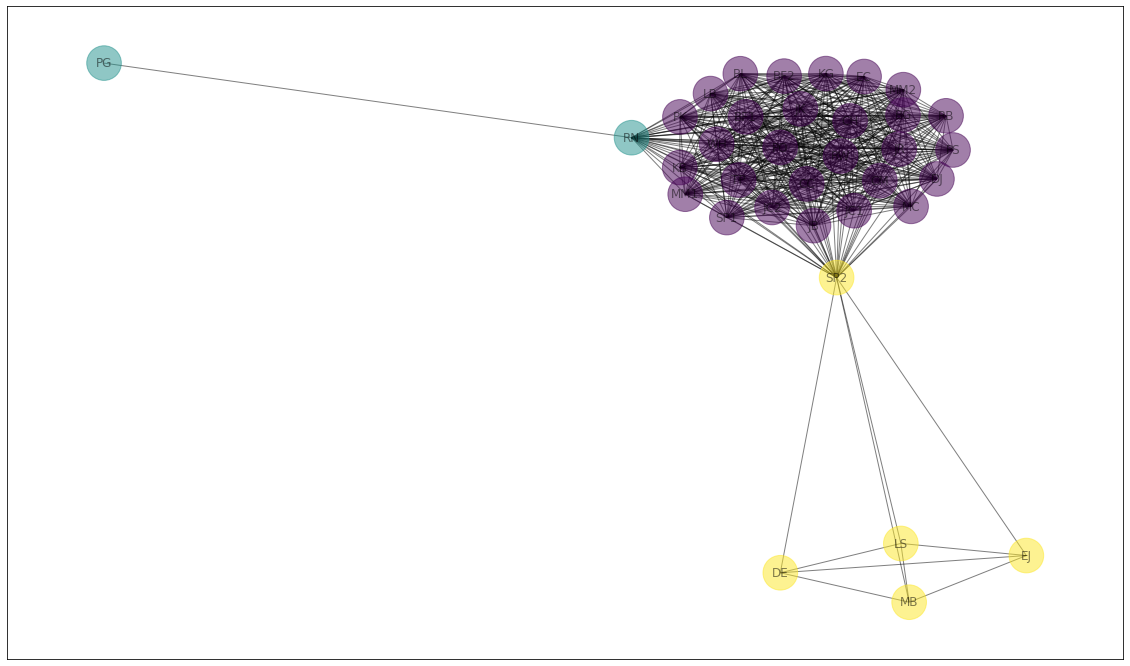

In [33]:
# fixing the size of the figure 
plt.figure(figsize = (20, 12))

# color the nodes according to their partition
cmap = matcm.get_cmap('viridis', max(partition.values()) + 1)

# draw the network
nx.draw_networkx(G, node_color = list(partition.values()), with_labels = True, cmap = cmap, 
                 font_size = 12, alpha=0.5, node_size = 1200, font_color = "k")

plt.show()


In [1]:
#Using other community detection algorithms

#Using cliques
# undirected only 
#https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.find_cliques.html#networkx.algorithms.clique.find_cliques

# generate the communities
communities_generator = list(nx.find_cliques(G))
communities_generator

NameError: name 'nx' is not defined

In [35]:
# assign group ids to the nodes in each community
groups = {}
for i in range(len(communities_generator)):
    for j in communities_generator[i]:
        groups.update({j: i})

# sort the previous dictionary based on the sequence of the original nodes
sorted_group = {}
for n in G.nodes:
    sorted_group.update({n: groups[n]})

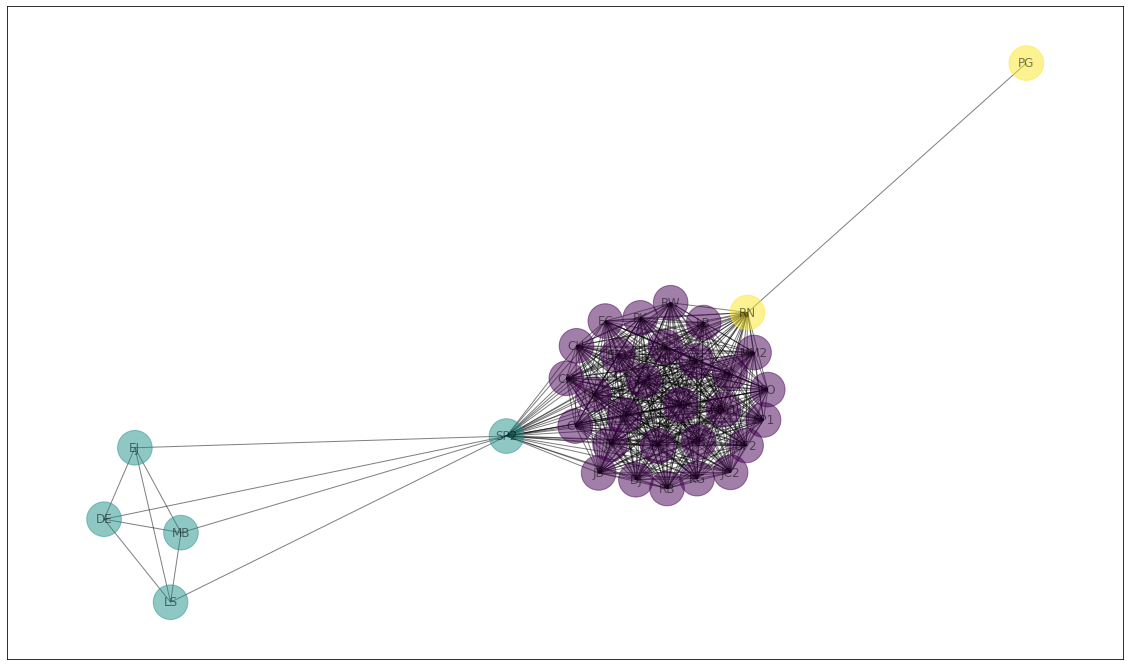

In [36]:
# fixing the size of the figure 
plt.figure(figsize = (20, 12))

# color the nodes according to their partition
cmap = matcm.get_cmap('viridis', max(sorted_group.values()) + 1)

# draw the network
nx.draw_networkx(G, node_color = list(sorted_group.values()), with_labels = True, cmap = cmap, 
                 font_size = 12, alpha=0.5, node_size = 1200, font_color = "k")

plt.show()

You can see that RN is present in both 1st and 2nd communities. Similarly, SP2 is also present in the 2nd and 3rd communities. Because of the order of the communities, RN is pushed to the 2nd community and SP2 to the 3rd community (based on the flow of the loops).

Girvan-Newman method
(directed or undirected)
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_

In [37]:
# generate the communities
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
l = sorted(map(sorted, next_level_communities))
l

[['BF1',
  'BF2',
  'BG',
  'BL',
  'CC',
  'CH',
  'CM',
  'DJ',
  'EC',
  'JB',
  'JC1',
  'JC2',
  'JK',
  'JR',
  'KB',
  'KG',
  'LB',
  'MC',
  'MM1',
  'MM2',
  'PK',
  'PO',
  'PS',
  'RB',
  'RN',
  'RW',
  'SP1',
  'SP2',
  'TP',
  'WH'],
 ['DE', 'EJ', 'LS', 'MB'],
 ['PG']]

In [38]:
# assign group ids to the nodes in each community
groups = {}
for i in range(len(l)):
    for j in l[i]:
        groups.update({j: i})

# sort the previous dictionary based on the sequence of the original nodes
sorted_group = {}
for n in G.nodes:
    sorted_group.update({n: groups[n]})

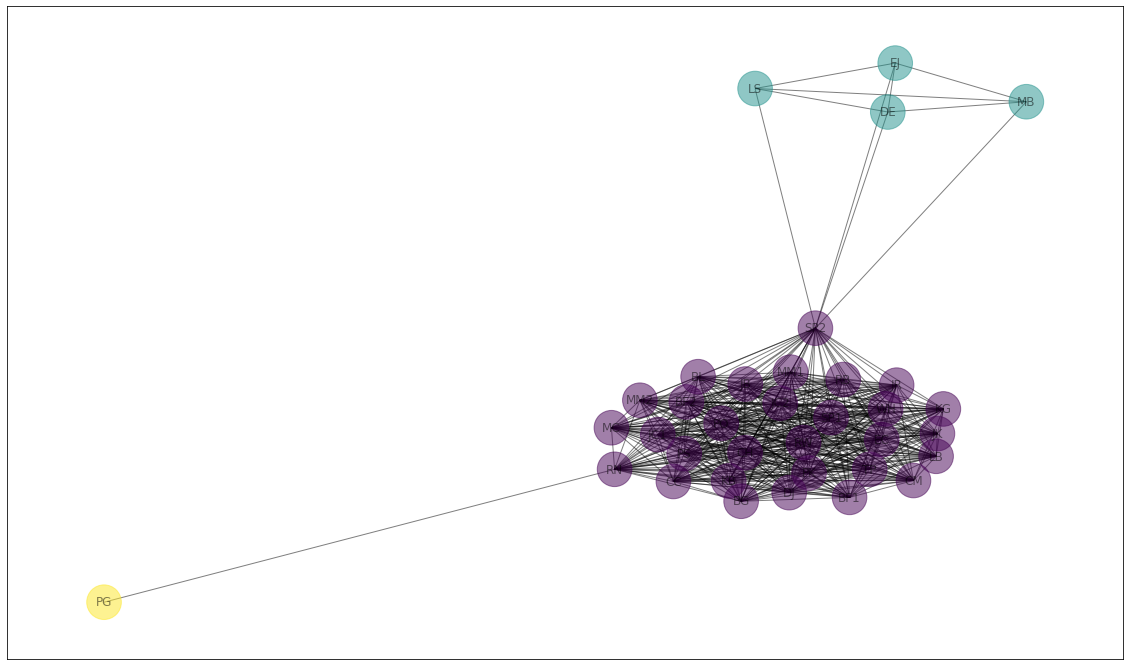

In [39]:
# fixing the size of the figure 
plt.figure(figsize = (20, 12))

# color the nodes according to their partition
cmap = matcm.get_cmap('viridis', max(sorted_group.values()) + 1)

# draw the network
nx.draw_networkx(G, node_color = list(sorted_group.values()), with_labels = True, cmap = cmap, 
                 font_size = 12, alpha = 0.5, node_size = 1200, font_color = "k")

plt.show()

Clauset-Newman-Moore greedy modularity maximization

directed or undirected

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities

In [41]:
# generate the communities
import networkx
communities_generator = networkx.algorithms.community.greedy_modularity_communities(G)
communities_generator

[frozenset({'BF1',
            'BF2',
            'BG',
            'BL',
            'CC',
            'CH',
            'CM',
            'DJ',
            'EC',
            'JB',
            'JC1',
            'JC2',
            'JK',
            'JR',
            'KB',
            'KG',
            'LB',
            'MC',
            'MM1',
            'MM2',
            'PK',
            'PO',
            'PS',
            'RB',
            'RW',
            'SP1',
            'TP',
            'WH'}),
 frozenset({'DE', 'EJ', 'LS', 'MB', 'SP2'}),
 frozenset({'PG', 'RN'})]

In [42]:
# assign group ids to the nodes in each community
groups = {}
for i in range(len(communities_generator)):
    for j in sorted(communities_generator[i]):
        groups.update({j: i})
        
# sort the previous dictionary based on the sequence of the original nodes
sorted_group = {}
for n in G.nodes:
    sorted_group.update({n: groups[n]})

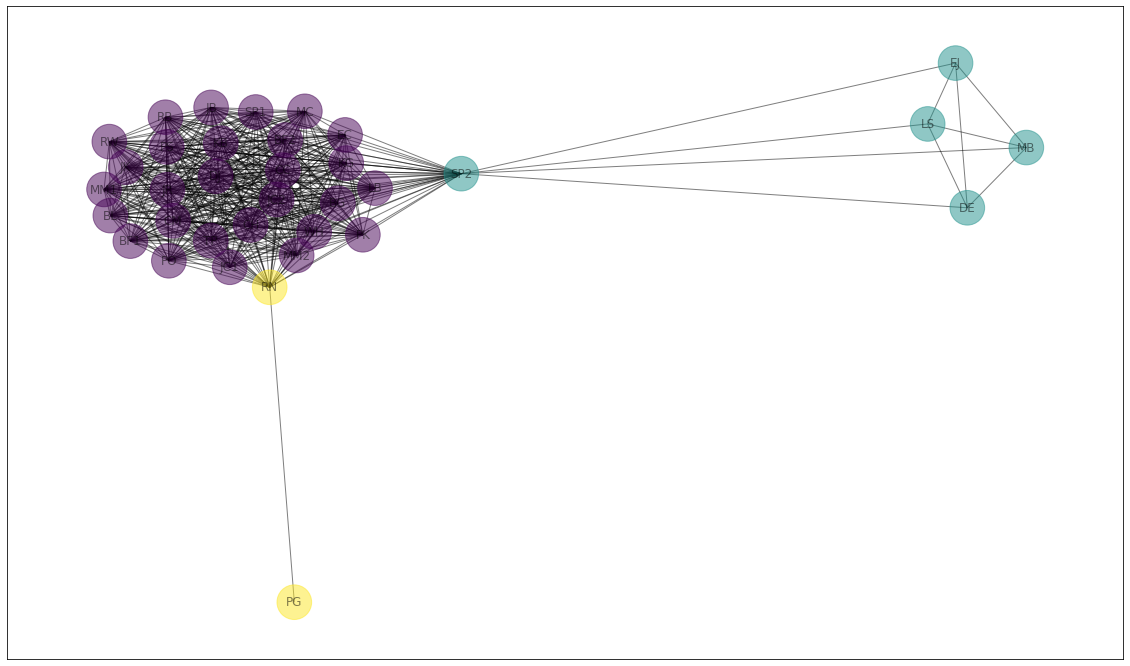

In [43]:
# fixing the size of the figure 
plt.figure(figsize = (20, 12))

# color the nodes according to their partition
cmap = matcm.get_cmap('viridis', max(sorted_group.values()) + 1)

# draw the network
nx.draw_networkx(G, node_color = list(sorted_group.values()), with_labels = True, cmap = cmap, 
                 font_size = 12, alpha=0.5, node_size = 1200, font_color = "k")

plt.show()

Fluid communities algorithm

undirected

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.asyn_fluid.asyn_fluidc.html#networkx.algorithms.community.asyn_fluid.asyn_fluidc

In [44]:
# For this you can specify the number of communities (k) you want.
k = 3

# generate the communities
communities_generator = list(networkx.algorithms.community.asyn_fluidc(G, k))
communities_generator

[{'BF1',
  'BF2',
  'BG',
  'BL',
  'CC',
  'CH',
  'CM',
  'DJ',
  'EC',
  'JB',
  'JC1',
  'JC2',
  'JK',
  'JR',
  'KB',
  'KG',
  'LB',
  'MC',
  'MM1',
  'MM2',
  'PK',
  'PO',
  'PS',
  'RB',
  'RW',
  'SP1',
  'TP',
  'WH'},
 {'DE', 'EJ', 'LS', 'MB', 'SP2'},
 {'PG', 'RN'}]

In [45]:
# assign group ids to the nodes in each community
groups = {}
for i in range(k):
    for j in list(communities_generator)[i]:
        groups.update({j: i})
        
# sort the previous dictionary based on the sequence of the original nodes
sorted_group = {}
for n in G.nodes:
    sorted_group.update({n: groups[n]})

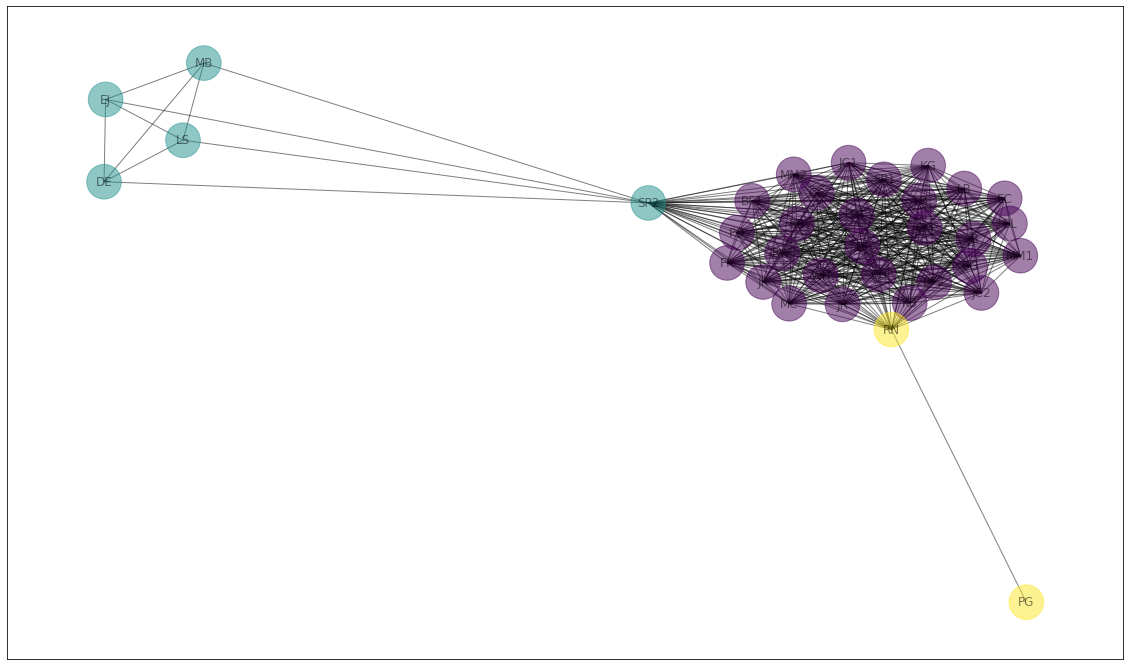

In [46]:
# fixing the size of the figure 
plt.figure(figsize = (20, 12))

# color the nodes according to their partition
cmap = matcm.get_cmap('viridis', max(sorted_group.values()) + 1)

# draw the network
nx.draw_networkx(G, node_color = list(sorted_group.values()), with_labels = True, cmap = cmap, 
                 font_size = 12, alpha=0.5, node_size = 1200, font_color = "k")

plt.show()